# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import KBinsDiscretizer,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
f"{countries.shape[0]} linhas e {countries.shape[1]} colunas"

'227 linhas e 20 colunas'

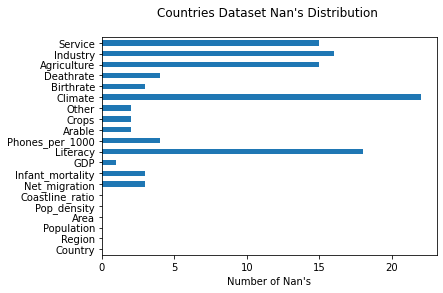

In [6]:
ax = countries.isna().sum().plot(kind = "barh")
ax.set_xlabel("Number of Nan's")
ax.set_title("Countries Dataset Nan's Distribution \n");

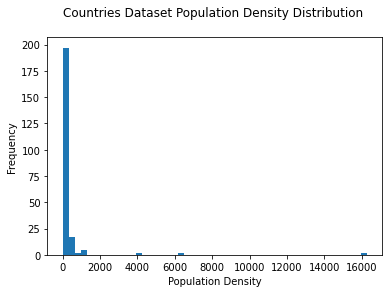

In [7]:
ax = countries["Pop_density"].str.replace(",",".").astype("float64").plot(kind = "hist",bins = 50)
ax.set_xlabel("Population Density")
ax.set_title("Countries Dataset Population Density Distribution \n");

In [8]:
# Cleaning Commas
countries_clean = countries.copy()         # Let's preserve the input data :) 
comma_features = list(countries_clean.select_dtypes("object").iloc[:,2:].columns)
countries_clean[comma_features] = (countries_clean[comma_features].stack().str
                                   .replace(",",".").unstack().astype("float"))
countries_clean.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [9]:
# Clean Data Types
countries_clean.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

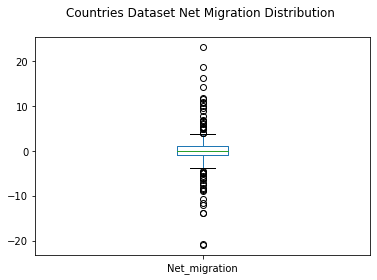

In [10]:
ax = countries_clean["Net_migration"].plot(kind = "box")
ax.set_title("Countries Dataset Net Migration Distribution \n");

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [11]:
def q1():
    return list(countries_clean["Region"].str.strip().sort_values().unique())   #strip method removes leading/trailing whitespaces.
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [12]:
def q2():
    pop_density_array = np.array(countries_clean["Pop_density"]).reshape(-1,1)  # Reshape to 2D Data
    discretizer = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
    quartile_labels = discretizer.fit_transform(pop_density_array)         # numpy array quartile-labeled
    return int((quartile_labels == 9).sum())                               # Quartile 90th encoded as 9
q2() 

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [13]:
def q3():
    return int(pd.get_dummies(countries_clean[['Region','Climate']]).shape[1] + 
               countries_clean[['Climate']].nunique()[0])
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [15]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [16]:
def q4():
    arable_col = countries_clean.columns.get_loc("Arable")
    numeric_cols = list(countries_clean.select_dtypes("number").columns)
    str_cols = list(countries_clean.select_dtypes("object").columns)
    imputer_scaler = (make_pipeline(SimpleImputer(strategy = "median"),
                                    StandardScaler()))                         # numerical transformations 
    col_transformer = (make_column_transformer(("passthrough",str_cols),       # parallel transformations
                                               (imputer_scaler,numeric_cols))) 
    col_transformer.fit(countries_clean)                                       # transformer fitted
    test_country_transf = (col_transformer.transform(pd.DataFrame(np.array(test_country)
                                                                  .reshape(1,-1),
                                                                   columns = str_cols + numeric_cols)))
    return float(np.round(test_country_transf[0][arable_col],3))
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [17]:
def q5():
    quantile_25 = countries_clean["Net_migration"].quantile(0.25)
    quantile_75 = countries_clean["Net_migration"].quantile(0.75)
    iqr = quantile_75 - quantile_25
    lower_bound = quantile_25 - 1.5*iqr
    upper_bound = quantile_75 + 1.5*iqr
    outliers_lower = countries_clean[countries_clean["Net_migration"] <= lower_bound].shape[0]
    outliers_higher = countries_clean[countries_clean["Net_migration"] >= upper_bound].shape[0]
    #5% of outliers threshold
    removal_criteria = ((outliers_lower + outliers_higher) / (countries_clean.shape[0])) <= 0.05 
    return tuple((outliers_lower,outliers_higher,removal_criteria))   
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [18]:
# Getting Data
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
newsgroup.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [19]:
def q6():
    cv = CountVectorizer()   
    cv_fit = cv.fit_transform(newsgroup["data"])    # Fetching the data from newsgroup dict
    tokens = cv.get_feature_names()                 # List of tokens from CountVectorizer
    phone_position = tokens.index("phone")          # "Phone" position in the list
    count_list = cv_fit.sum(axis = 0)               # List of tokens frequencies in the corpus
    return int(count_list[:,phone_position])        # "Phone" count
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [20]:
def q7():
    cv = TfidfVectorizer()   
    cv_fit = cv.fit_transform(newsgroup["data"])               # Fetching the data from newsgroup dict
    tokens = cv.get_feature_names()                            # List of tokens from TfidfVectorizer
    phone_position = tokens.index("phone")                     # "Phone" position in the list
    count_list = cv_fit.sum(axis = 0)                          # List of tokens frequencies in the corpus
    return float(count_list[:,phone_position].round(3))        # "Phone" tfidf
q7()

8.888